In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [10]:
import keras
from keras.layers import *
from keras.models import Model, Sequential
from keras.applications import inception_v3
from keras.preprocessing.image import ImageDataGenerator, load_img

In [4]:
wrk_dir = os.getcwd()

In [5]:
train_dir = os.path.join(wrk_dir,"Train")
test_dir = os.path.join(wrk_dir,"Test")

In [6]:
datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [23]:
train_set = datagen.flow_from_directory(train_dir,target_size=(299,299), batch_size=32,class_mode="categorical")
test_set = datagen.flow_from_directory(test_dir,target_size=(299,299), batch_size=32,class_mode="categorical")

Found 253 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [22]:
model = inception_v3.InceptionV3(include_top= False, input_shape = (299,299,3))

In [24]:
for layer in model.layers:
    layer.trainable = False

In [25]:
x = Flatten()(model.output)

In [27]:
predictions = Dense(len(os.listdir(train_dir)), activation="softmax")(x)

In [28]:
model = Model(model.input,predictions)

In [29]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
model.fit(train_set,validation_data=test_set, steps_per_epoch=len(train_set), validation_steps=len(test_set), epochs=3)

Epoch 1/3
8/8 [==============================] - 99s 12s/step - loss: 7.5577 - accuracy: 0.6126 - val_loss: 0.6464 - val_accuracy: 0.8438
Epoch 2/3
8/8 [==============================] - 91s 11s/step - loss: 2.5303 - accuracy: 0.7391 - val_loss: 1.3267 - val_accuracy: 0.7500
Epoch 3/3
8/8 [==============================] - 92s 12s/step - loss: 1.0559 - accuracy: 0.8617 - val_loss: 1.1036 - val_accuracy: 0.7812


In [31]:
test_pred = model.predict(test_set)

In [32]:
test_ind = np.argmax(test_pred, axis = 1)

In [33]:
test_ind

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [34]:
label_encod = {0:"NO", 1:"Yes"}

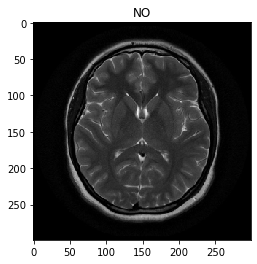

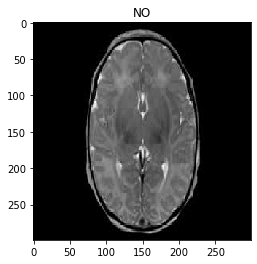

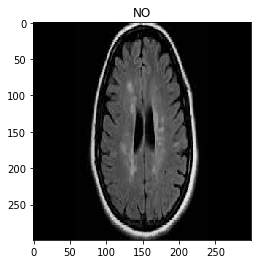

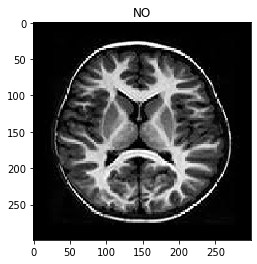

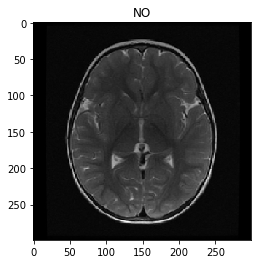

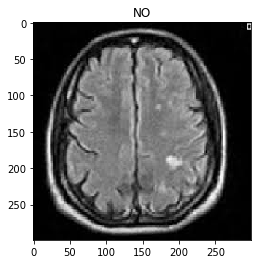

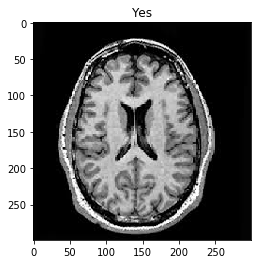

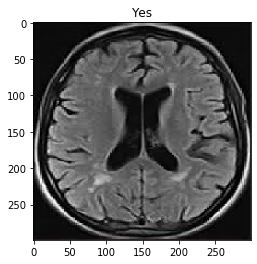

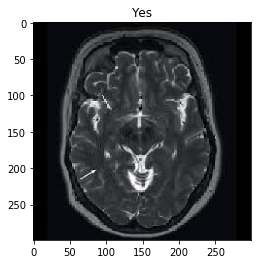

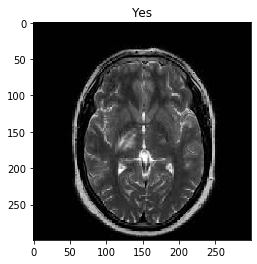

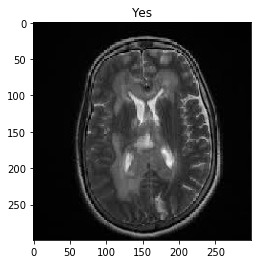

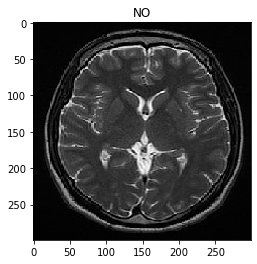

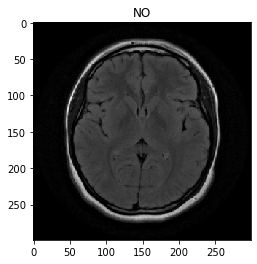

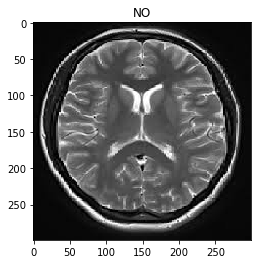

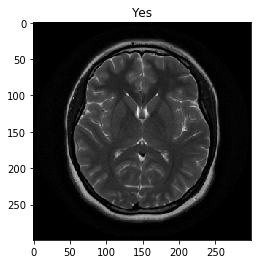

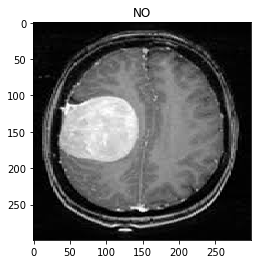

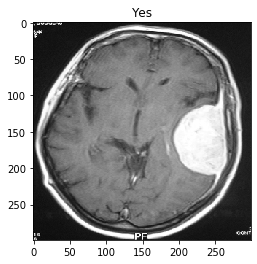

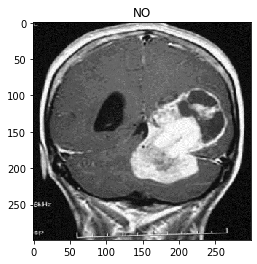

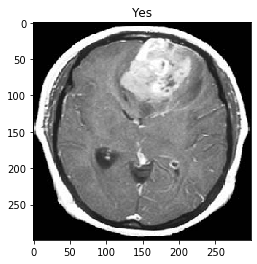

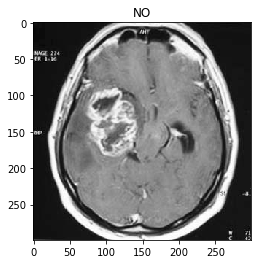

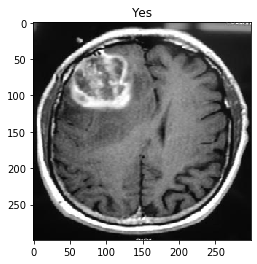

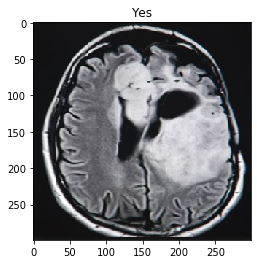

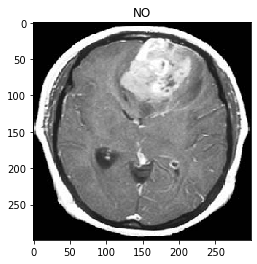

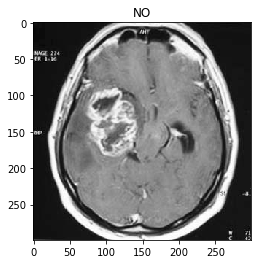

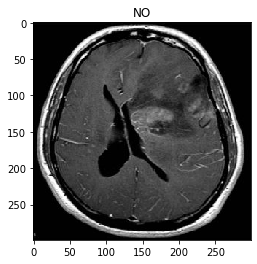

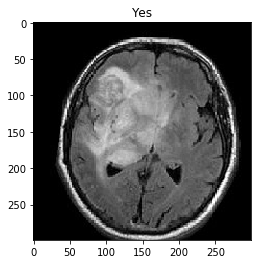

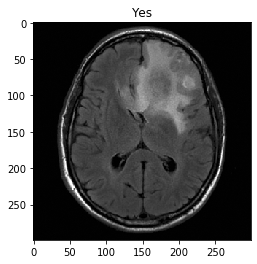

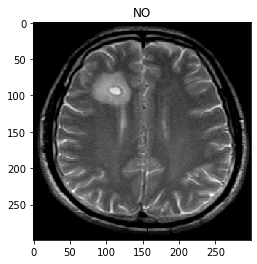

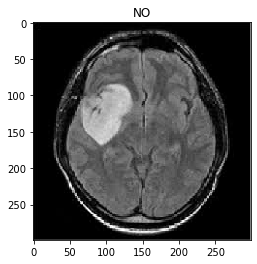

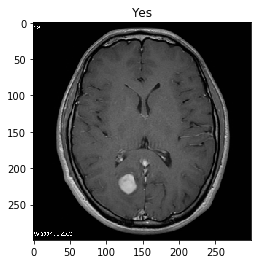

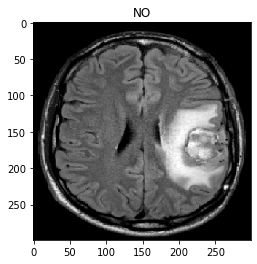

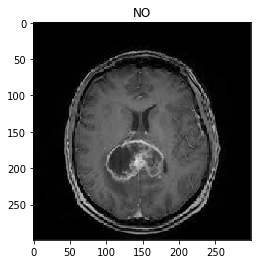

In [35]:
k = 0
for i in os.listdir(test_dir):
    img_dir = os.path.join(test_dir,i)
    for j in os.listdir(img_dir):
        img = load_img(os.path.join(img_dir,j),target_size=(299,299))
        plt.imshow(img)
        plt.title(label_encod[test_ind[k]])
        plt.show()
        k+=1

In [36]:
true_pred = []
k = 0
for i in os.listdir(test_dir):
    for j in os.listdir(os.path.join(test_dir,i)):
        if(k ==0):
            true_pred.append(0)
        else:
            true_pred.append(1)
    k+=1
    

In [37]:
true_pred = np.array(true_pred)

In [38]:
true_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(test_ind,true_pred)

0.5

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(224, 224, 3), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='valid'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))

C:\Users\Saikrishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`


In [13]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [14]:
model.fit(train_set,validation_data=test_set, steps_per_epoch=len(train_set), validation_steps=len(test_set), epochs=3)


Epoch 1/3
8/8 [==============================] - 102s 13s/step - loss: 21.4146 - accuracy: 0.5810 - val_loss: 8.2375 - val_accuracy: 0.5312
Epoch 2/3
8/8 [==============================] - 104s 13s/step - loss: 9.1720 - accuracy: 0.6759 - val_loss: 3.1625 - val_accuracy: 0.5625
Epoch 3/3
8/8 [==============================] - 100s 12s/step - loss: 4.2787 - accuracy: 0.6719 - val_loss: 9.3559 - val_accuracy: 0.5312


In [16]:
test_pred = model.predict(test_set)

In [17]:
test_ind = np.argmax(test_pred, axis = 1)

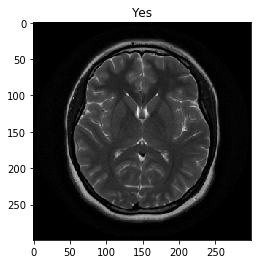

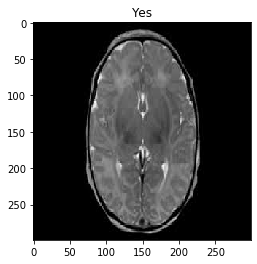

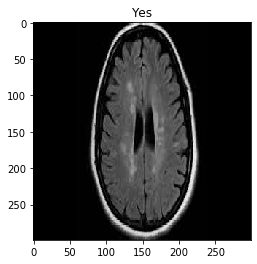

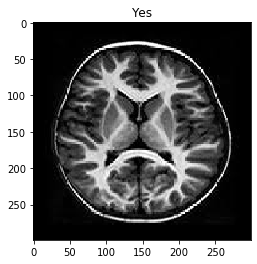

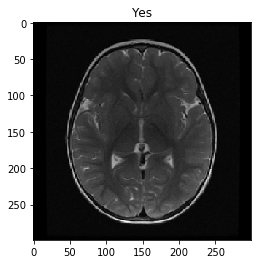

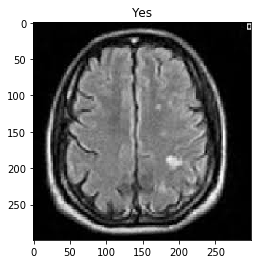

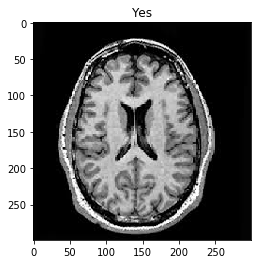

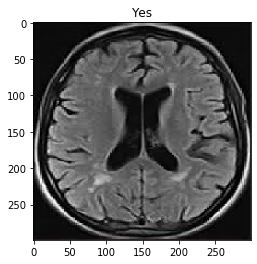

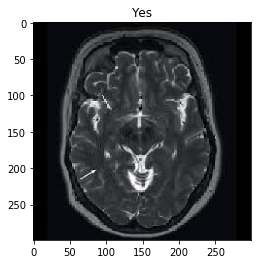

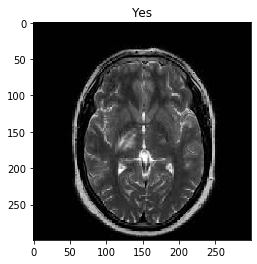

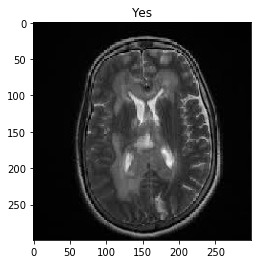

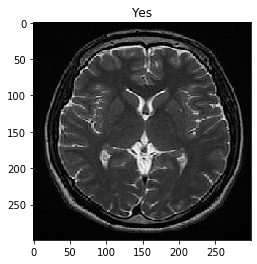

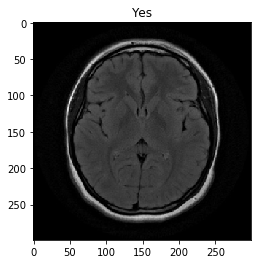

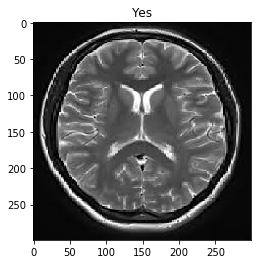

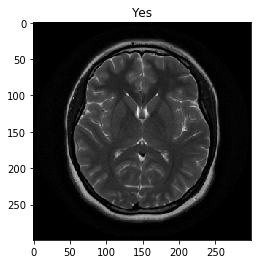

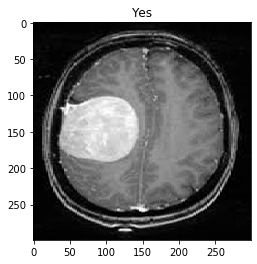

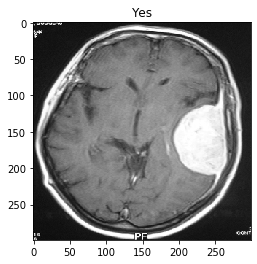

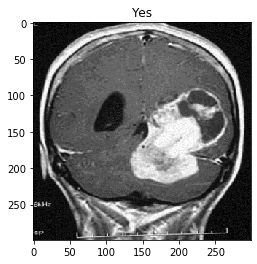

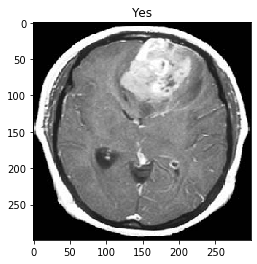

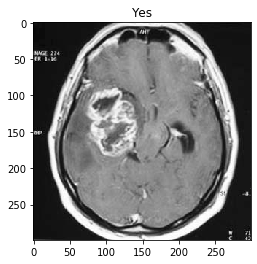

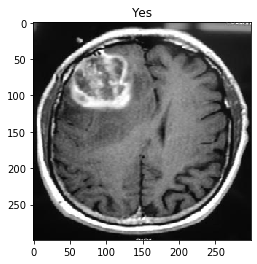

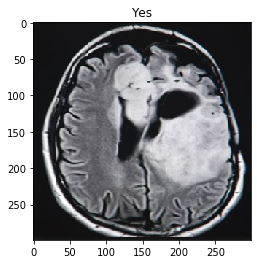

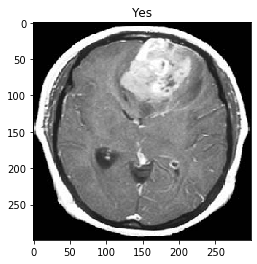

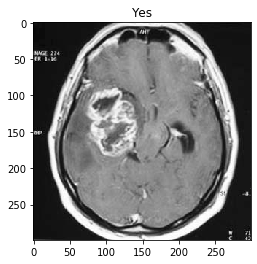

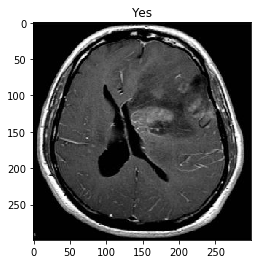

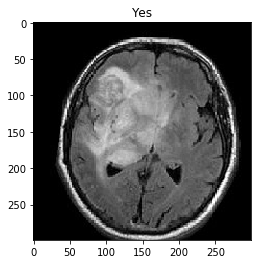

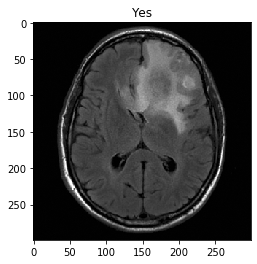

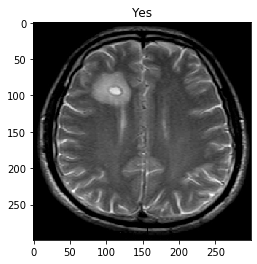

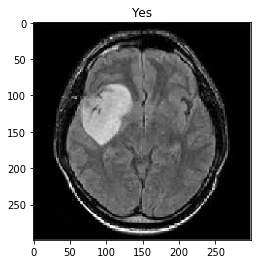

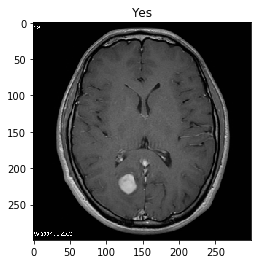

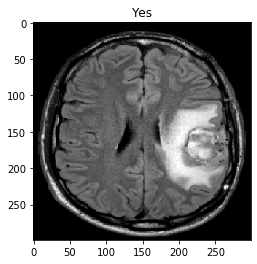

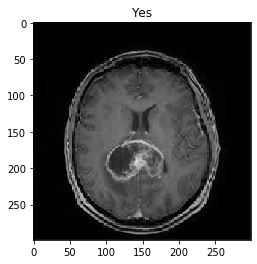

In [18]:
k = 0
for i in os.listdir(test_dir):
    img_dir = os.path.join(test_dir,i)
    for j in os.listdir(img_dir):
        img = load_img(os.path.join(img_dir,j),target_size=(299,299))
        plt.imshow(img)
        plt.title(label_encod[test_ind[k]])
        plt.show()
        k+=1

In [19]:
true_pred = []
k = 0
for i in os.listdir(test_dir):
    for j in os.listdir(os.path.join(test_dir,i)):
        if(k ==0):
            true_pred.append(0)
        else:
            true_pred.append(1)
    k+=1

In [20]:
true_pred = np.array(true_pred)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(test_ind,true_pred)

0.53125